# 2. Answer following questions:

**1. Why we need machine learning methods instead of creating a complicated formula?**

**Ans:**
机器自主学习参数能大大降低工作的复杂度，且能够拟合我们通过观察没办法想到的复杂函数

**2. Wha't's the disadvantages of the 1st Random Choosen methods in our course?**

**Ans:**
随机搜索效率太低，没有用到先前的知识，搜索一直是漫无目的，收敛很慢

**3. Is the 2nd method supervised direction better than 1st one? What's the disadvantages of the 2nd supversied directin method?**

**Ans:**
Yes,第二种方法先前指定了搜索的方向，但是在高维度的场景下，是没办法预先定义所有的方向

**4. Why do we use Derivative / Gredient to fit a target function?**

**Ans:**
函数沿梯度的反方向下降最快，所以我们通过求导找到loss function的梯度，就能知道其下降最快方向，朝着这个方向调整参数能很快收敛

**5. In the words 'Gredient Descent', what's the Gredient and what's the Descent?**

**Ans:**
Gredient：梯度 函数沿梯度的方向变化最快，Descent：下降，我们需要使loss function的值下降。连起来就是使loss function的值沿梯度方向下降

**6. What's the advantages of the 3rd gradient descent method compared to the previous methods?**

**Ans:**
损失函数值下降速度快，且不用预先设定方向，避免维数问题

**7. Using the simple words to describe: What's the machine leanring.**

**Ans:**
计算机通过大量数据学习到经验，并且将经验用到新的数据中完成数据分类，回归等任务

# 3. Finish the search problem

In [1]:
#headers是请求头，伪装成浏览器，否则会重定向超出？？
#response默认编码是ISO-8859-1，但实际内容编码是utf-8，解码成txt使用ISO-8859-1出现问题
#response.apparent_encoding从内容中分析出实际编码
import requests
import re
url = 'https://baike.baidu.com/item/北京地铁/408485'
headers = {
           "User-Agent":'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.71 Safari/537.36'}             
response = requests.get(url,headers = headers)
print(response.encoding)
print (response.apparent_encoding)

ISO-8859-1
utf-8


In [2]:
response.encoding = 'utf-8'
html_content = response.text

##  3.1BeautifulSoup

In [3]:
from bs4 import BeautifulSoup

In [4]:
ditie_soup = BeautifulSoup(html_content, "lxml")

##  3.2 Preprocessing data from page source

In [1]:
print(ditie_soup.prettify())#soup.prettify()格式化输出,有缩进

In [2]:
table= ditie_soup.find_all('table')#返回所有符合的标签
table

In [7]:
#soup.div取标签(Tag)div :<div.+>...</div>,返回Tag类型     soup.div.string 取标签内内的内容，即显示在网站上的字（部分）,返回字符串
ditie_table = []
ditie_table.append(table[0])
ditie_table.append(table[2])
ditie_table.append(table[4])#取有地铁线url的table   
ditie_table  = [tag.find_all('a')for tag in ditie_table ]
ditie_table = ditie_table[0]+ditie_table[1]+ ditie_table[2]
ditie_table = list(set(ditie_table))
ditie_table
#ditie_table = [str(tag)for tag in ditie_table]#字符串化
#route_url = re.findall('''(/item/[\w|\d|%|/]+[F|\d])\"''',"".join(ditie_table)) 这两行是整体取url

[<a href="/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81%E6%88%BF%E5%B1%B1%E7%BA%BF" target="_blank">北京地铁房山线</a>,
 <a class="sup-anchor" name="ref_[64]_14765801"> </a>,
 <a href="/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%8113%E5%8F%B7%E7%BA%BF" target="_blank">北京地铁13号线</a>,
 <a data-lemmaid="897830" href="/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%818%E5%8F%B7%E7%BA%BF/897830" target="_blank">北京地铁8号线</a>,
 <a href="/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%8115%E5%8F%B7%E7%BA%BF" target="_blank">北京地铁15号线</a>,
 <a href="/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%8116%E5%8F%B7%E7%BA%BF" target="_blank">北京地铁16号线</a>,
 <a href="/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81%E6%9C%BA%E5%9C%BA%E7%BA%BF" target="_blank">北京地铁机场线</a>,
 <a href="/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%812%E5%8F%B7%E7%BA%BF" target="_blank">北京地铁2号线</a>,
 <a href="/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%815%E5%8F%B7%E7%BA%BF" target="_blank">北京地铁5号线</a>,
 <a href="/item/%E5%A4%8D%E5%85%AB%E7%BA%BF" target="_blank">复八线</a>,
 <a clas

In [8]:
#过滤重复和复八线
def filter(ditie_table):
    ditiexian = []
    seen = set()
    for tag in  ditie_table:
        if tag.string =="\xa0"or tag.string == "复八线" or tag.string in seen:continue
        seen.add(tag.string)
        ditiexian.append(tag)
    return ditiexian

In [9]:
route_tag = filter(ditie_table)
route_tag

[<a href="/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81%E6%88%BF%E5%B1%B1%E7%BA%BF" target="_blank">北京地铁房山线</a>,
 <a href="/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%8113%E5%8F%B7%E7%BA%BF" target="_blank">北京地铁13号线</a>,
 <a data-lemmaid="897830" href="/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%818%E5%8F%B7%E7%BA%BF/897830" target="_blank">北京地铁8号线</a>,
 <a href="/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%8115%E5%8F%B7%E7%BA%BF" target="_blank">北京地铁15号线</a>,
 <a href="/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%8116%E5%8F%B7%E7%BA%BF" target="_blank">北京地铁16号线</a>,
 <a href="/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81%E6%9C%BA%E5%9C%BA%E7%BA%BF" target="_blank">北京地铁机场线</a>,
 <a href="/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%812%E5%8F%B7%E7%BA%BF" target="_blank">北京地铁2号线</a>,
 <a href="/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%815%E5%8F%B7%E7%BA%BF" target="_blank">北京地铁5号线</a>,
 <a href="/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81%E6%98%8C%E5%B9%B3%E7%BA%BF" target="_blank">北京地铁昌平线</a>,
 <a href="/item/%E5%8C%

## 3.3 Build the search agent

In [10]:
import re
def get_route_url(tag):
    return "https://baike.baidu.com" + re.findall('''(/item/[\w|\d|%|/]+[F|\d])\"''',str(tag))[0]


In [11]:
def get_station(url):
    response = requests.get(url,headers = headers)
    response.encoding = 'utf-8'
    html_content = response.text
    soup = BeautifulSoup(html_content, "lxml")
    table = soup.find_all('table') #取所有的表
    station_tag = []
    station = [] 
    for tag in table:
        if tag.caption:
            temp_tag = BeautifulSoup(str(tag.caption).replace("<br/>",""), "lxml")#有<br>显示不出来
            if temp_tag.string and re.findall("北京地铁.+车站列表",temp_tag.string.strip()):#tag.caption.string):#找出北京地铁车站列表的表
                station_tag.append(tag)
                break
            elif temp_tag.string and re.findall("北京地铁.+车站信息",temp_tag.string.strip()):#没有北京地铁车站列表就换成车站信息表
                station_tag.append(tag)
                break
    if not station_tag:
        station_tag = table#都没有就全取了
    for i in range(len(station_tag)):
        for index in station_tag[i].find_all("a"):#名称在a标签里
            if index.string and re.findall("\w+站$",index.string):
                station.append(index.string)
    return station

In [12]:
def get_route_station(route_tag):
    route_station = {}
    all_stations = []
    for tag in route_tag:
        route_url = get_route_url(tag)
        #print (route_url)
        route_name = tag.string
        #print(get_station_1(route_url))
        station = get_station(route_url)
        route_station[route_name] = station
        all_stations += station
    return route_station,all_stations

In [13]:
route_station,all_stations = get_route_station(route_tag)

In [14]:
eight = route_station.pop("北京地铁8号线")#八号线分南北中间不连

In [15]:
route_station["北京地铁8号线南段"] = ['珠市口站','天桥站','永定门外站','木樨园站','海户屯站','大红门站','大红门南站','和义站',                            
'东高地站', '火箭万源站','五福堂站','德茂站','瀛海站']
route_station["北京地铁8号线北段"] = ['朱辛庄站','育知路站','平西府站','回龙观东大街站','霍营站','育新站','西小口站','永泰庄站',
 '林萃桥站','森林公园南门站','奥林匹克公园站','奥体中心站','北土城站','安华桥站','安德里北街站','鼓楼大街站','什刹海站','南锣鼓巷站','中国美术馆站',]

In [56]:
route_station["北京地铁1号线"]

['三家店站',
 '黑石头站',
 '高井站',
 '福寿岭站',
 '苹果园站',
 '古城站',
 '衙门口站',
 '八角游乐园站',
 '八宝山站',
 '玉泉路站',
 '五棵松站',
 '万寿路站',
 '公主坟站',
 '军事博物馆站',
 '木樨地站',
 '南礼士路站',
 '复兴门站',
 '西单站',
 '天安门西站',
 '天安门东站',
 '王府井站',
 '东单站',
 '建国门站',
 '永安里站',
 '国贸站',
 '大望路站',
 '四惠站',
 '四惠东站',
 '高碑店站',
 '传媒大学站',
 '双桥站',
 '管庄站',
 '八里桥站',
 '通州北苑站',
 '果园站',
 '九棵树站',
 '梨园站',
 '临河里站',
 '土桥站',
 '施园站',
 '环球影城站']

In [17]:
import networkx as nx
import matplotlib.pyplot as plt
subway_graph = nx.Graph() 
for key in route_station:
    for i in  range(len(route_station[key])-1):
        subway_graph.add_edge(route_station[key][i],route_station[key][i+1])

In [18]:
%matplotlib inline

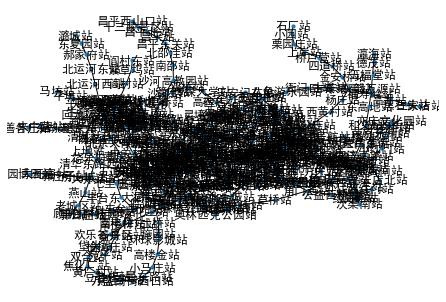

In [29]:
nx.draw(subway_graph,with_labels=True, node_size=10)


In [19]:
subway_graph['安贞门站']#注意这里的type

AtlasView({'北土城站': {}, '惠新西街南口站': {}})

## 3.4Create different policies for transfer system.

In [107]:
def search_route(graph,search_strategy):
    start = input("start station:")
    destination = input("goal station:")
    pathes = [[start] ]
    seen = set()
    while pathes:
        path = pathes.pop(0)
        froniter = path[-1]
        
        if froniter in seen: continue
            
        successors = graph[froniter]
        
        for station in successors: 
            if station in path: continue
            
            new_path = path+[station]#每次所有的path都加1，感觉排序没有意义
            
            pathes.append(new_path)
        
            if station == destination: 
               # print(pathes)
                return new_path
#        print('len(pathes)={}'.format(pathes))
        seen.add(froniter)
        pathes = search_strategy(pathes)

In [103]:
def sort_path(cmp_func):
    def _sorted(pathes):
        return sorted(pathes, key=cmp_func)
    return _sorted

In [104]:
def get_total_station(path):
    return len(path)

In [108]:
search_route(subway_graph ,search_strategy=sort_path(get_total_station))

start station:安贞门站
goal station:化工站


['安贞门站',
 '惠新西街南口站',
 '芍药居站',
 '太阳宫站',
 '三元桥站',
 '亮马桥站',
 '农业展览馆站',
 '团结湖站',
 '呼家楼站',
 '金台路站',
 '大望路站',
 '九龙山站',
 '大郊亭站',
 '百子湾站',
 '化工站']

## 3.4 by_pass route

In [145]:
def search_route_bypass(graph,search_strategy):
    start = input("start station:")
    a = input("goal station:")
    destination = []
    destination.append(a)
    by_way = input("pass station:").split("，")
    path = []
    while by_way:#range(0) = []
        new_path,station = search(start, by_way, graph,search_strategy)
        by_way.remove(station)
        start = station
        path +=  new_path
    new_path,station = search(station, destination, graph,search_strategy)
    path +=  new_path
    path.append(station)
    return path

In [138]:
def search(start,destination,graph,search_strategy):
    pathes = [[start] ]
    seen = set()
    while pathes:
        path = pathes.pop(0)
        froniter = path[-1]
        
        if froniter in seen: continue
            
        successors = graph[froniter]
        
        for station in successors: 
            if station in path: continue
            if station in destination: 
               # print(pathes)
                return new_path,station
            new_path = path+[station]#每次所有的path都加1，感觉排序没有意义
            pathes.append(new_path)
#        print('len(pathes)={}'.format(pathes))
        seen.add(froniter)
        pathes = search_strategy(pathes)

In [146]:
search_route_bypass(subway_graph ,search_strategy=sort_path(get_total_station))

start station:安贞门站
goal station:化工站
pass station:苹果园站，西单站，国贸站


['安贞门站',
 '北土城站',
 '安华桥站',
 '安德里北街站',
 '鼓楼大街站',
 '积水潭站',
 '西直门站',
 '车公庄站',
 '阜成门站',
 '复兴门站',
 '南礼士路站',
 '西单站',
 '天安门西站',
 '天安门东站',
 '王府井站',
 '东单站',
 '建国门站',
 '朝阳门站',
 '东大桥站',
 '国贸站',
 '永安里站',
 '建国门站',
 '朝阳门站',
 '东四站',
 '南锣鼓巷站',
 '北海北站',
 '平安里站',
 '车公庄站',
 '西直门站',
 '大钟寺站',
 '知春路站',
 '知春里站',
 '海淀黄庄站',
 '苏州街站',
 '巴沟站',
 '颐和园西门站',
 '茶棚站',
 '万安站',
 '植物园站',
 '苹果园站',
 '杨庄站',
 '西黄村站',
 '廖公庄站',
 '田村站',
 '海淀五路居站',
 '慈寿寺站',
 '花园桥站',
 '白石桥南站',
 '二里沟站',
 '车公庄西站',
 '车公庄站',
 '平安里站',
 '北海北站',
 '南锣鼓巷站',
 '东四站',
 '朝阳门站',
 '建国门站',
 '永安里站',
 '国贸站',
 '大望路站',
 '四惠站',
 '四惠东站',
 '高碑店站',
 '传媒大学站',
 '化工站']